In [1]:
#1 Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset= pd.read_csv("C:/Users/Natalia/Desktop/Summer2020/Segundo Projeto/clientes.csv")
#Select the annual income and the spending score columns X=dataset.iloc[:, [3,4]].values

In [4]:
dataset

,ID,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10
0,1,21,80,37,27,5,38,55,7,4,54
1,2,23,83,37,30,12,32,61,10,9,48
2,3,22,96,35,28,3,32,64,6,4,50
3,4,71,58,34,26,6,88,13,1,0,20
4,5,22,84,32,29,14,31,52,19,4,48
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,74,78,31,29,15,85,17,3,1,19
9996,9997,23,98,35,26,3,40,62,9,7,60
9997,9998,22,74,33,26,5,33,63,17,10,60
9998,9999,72,84,35,30,9,83,20,3,2,2


In [5]:
dataset = dataset.drop(columns="ID")

In [6]:
dataset

,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10
0,21,80,37,27,5,38,55,7,4,54
1,23,83,37,30,12,32,61,10,9,48
2,22,96,35,28,3,32,64,6,4,50
3,71,58,34,26,6,88,13,1,0,20
4,22,84,32,29,14,31,52,19,4,48
...,...,...,...,...,...,...,...,...,...,...
9995,74,78,31,29,15,85,17,3,1,19
9996,23,98,35,26,3,40,62,9,7,60
9997,22,74,33,26,5,33,63,17,10,60
9998,72,84,35,30,9,83,20,3,2,2


In [7]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler() #escalando o dataset
mms.fit(dataset)
dataset =mms.transform(dataset)

In [8]:
dataset

array([[0.28      , 0.59183673, 1.        , ..., 0.12244898, 0.06666667,
        0.89830508],
       [0.30666667, 0.65306122, 1.        , ..., 0.18367347, 0.15      ,
        0.79661017],
       [0.29333333, 0.91836735, 0.66666667, ..., 0.10204082, 0.06666667,
        0.83050847],
       ...,
       [0.29333333, 0.46938776, 0.33333333, ..., 0.32653061, 0.16666667,
        1.        ],
       [0.96      , 0.67346939, 0.66666667, ..., 0.04081633, 0.03333333,
        0.01694915],
       [1.        , 0.14285714, 1.        , ..., 0.06122449, 0.01666667,
        0.20338983]])

In [9]:
dataset = pd.DataFrame(dataset, columns=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])

In [16]:
dataset

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,0.280000,0.591837,1.000000,0.25,0.210526,0.422222,0.843750,0.122449,0.066667,0.898305
1,0.306667,0.653061,1.000000,1.00,0.578947,0.355556,0.937500,0.183673,0.150000,0.796610
2,0.293333,0.918367,0.666667,0.50,0.105263,0.355556,0.984375,0.102041,0.066667,0.830508
3,0.946667,0.142857,0.500000,0.00,0.263158,0.977778,0.187500,0.000000,0.000000,0.322034
4,0.293333,0.673469,0.166667,0.75,0.684211,0.344444,0.796875,0.367347,0.066667,0.796610
...,...,...,...,...,...,...,...,...,...,...
9995,0.986667,0.551020,0.000000,0.75,0.736842,0.944444,0.250000,0.040816,0.016667,0.305085
9996,0.306667,0.959184,0.666667,0.00,0.105263,0.444444,0.953125,0.163265,0.116667,1.000000
9997,0.293333,0.469388,0.333333,0.00,0.210526,0.366667,0.968750,0.326531,0.166667,1.000000
9998,0.960000,0.673469,0.666667,1.00,0.421053,0.922222,0.296875,0.040816,0.033333,0.016949


In [10]:
X = np.array(dataset)

In [18]:
def calculate_wcss(dataset):
    So = [] #aplicando elbow point
    n = range(1,10)
    for N in n:
        km = KMeans(n_clusters=N)
        km = km.fit(dataset)
        So.append(km.inertia_)
    return So

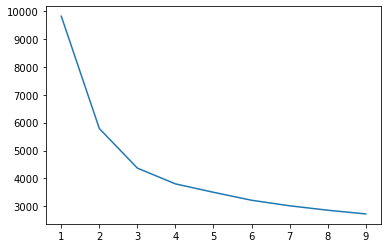

In [20]:
So = calculate_wcss(dataset)
plt.plot(range(1,10),So) #plotando o gráfico
plt.show()

In [21]:
def optimal_number_of_clusters(So): #calculando distância entre cada ponto em relação a reta que passa por a1 e a9
    x1, y1 = 2, So[0]
    x2, y2 = 20, So[len(So)-1]

    distances = []
    for i in range(len(So)):
        x0 = i+2
        y0 = So[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [24]:
So = calculate_wcss(dataset)
import math
# calculando a quantidade ótima de clusters
k_ideal = optimal_number_of_clusters(So)
k_ideal

5

In [25]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=5, n_samples=10000, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 9.22501894 -1.6875757 ]
 [-2.49346611  2.11383306]
 [ 1.58016528  3.85051071]
 [-1.43939144  2.28826426]
 [ 9.49453833 -2.1045749 ]
 [-1.57663327  2.70825651]
 [ 2.37645512  0.55035625]
 [ 0.18749201  3.7923129 ]
 [ 0.12042076  7.62470644]
 [ 9.81879055 -1.97438815]] [4 2 0 2 4 2 1 0 3 4]


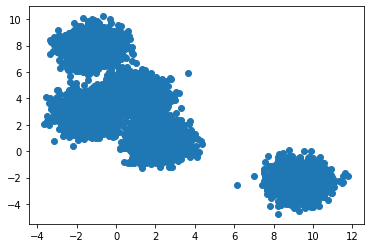

In [26]:

plt.scatter(X[:,0],X[:,1]);

In [27]:
from sklearn.cluster import KMeans
model = KMeans(5)
model.fit(X)
print(model.cluster_centers_)

[[ 0.94982563  4.3040176 ]
 [ 9.25674584 -2.28908786]
 [ 2.05988726  0.88669136]
 [-1.23534254  7.83720872]
 [-1.55264402  2.89713854]]


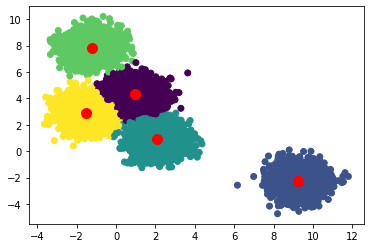

In [28]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

In [29]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.3953


In [30]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [31]:
permutation = find_permutation(5, y, model.labels_)
print(permutation)

[0, 4, 1, 3, 2]


In [32]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.9893


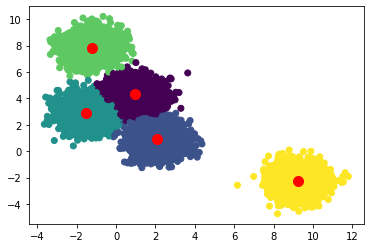

In [41]:
plt.scatter(X[:,0],X[:,1], c=new_labels);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres